# Project: Investigate a Dataset (TMDb movies dataset )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: For this project I am using TMDb movies dataset.
This data set contains information about more than 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

>**Question that can analyised from this data set.**
>1. Movies which had most and least profit
2. Movies with largest and lowest budgets
3. Movies with most and least earned revenu.
4. Movies with longest and shortest runtime values
5. Average runtime of all the movies.
6. How did the amount of produced films changed over time?
7. In which year we had most no.of profitable movies?.
>-----------------
>**Question respest to the profitable and ranked movies.**
>1. Show the successful genres (with respest to the profitable movies).
2. The No.of movies for each category (most ranked and earned).
3. Most frequent cast (with respest to the profitable movies).
4. Most Frequent Cast( most profit and ranked).
5. Average budget (with respest to the profitable movies)
6. Average revenue (with respest to the profitable movies)
7. Average duration of the movie 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <a id='wrangling'></a>
## Data Wrangling

>After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 


### Load and explore the data

In [2]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08




###    Obsevations from the data set

> No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

In [4]:
df.shape
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataframe contains 10866 rows and 21 columns


the dataframe contains 10866 rows and 21 columns

### Get more information about the data
>the dataframe contains integer, float and string values.
And there are some columns that contain Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
print(list(df.columns))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']



### Data Cleaning (Removing the unused information from the dataset)
> 1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
> 2. Removing the duplicacy in the rows(if any).
> 3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
> 4. Changing release date column into date format.
> 5. Check runtime column and replacing zero with NAN if exist.
> 6. Changing format of budget and revenue column.

#### 1-Removing Unused columns
>Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies,and vote_count

In [8]:
#creating a list of columns to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

#deleting the columns
df = df.drop(del_col,1)

#show the new dataset
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015


#### 2-Removing the duplicacy in the rows(if any).

In [9]:
rows, col = df.shape
#We need to reduce the count of row by one as it contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 11 no.of columns in it.


> Now remove the duplicated

In [10]:
#get the number of duplicated rows 

df.drop_duplicates(keep ='first', inplace=True)
no_row = df.shape[0]
print("duplicated rows which deleted = {}".format(rows-no_row))

duplicated rows which deleted = 1


#### 3- Removing 0's from budget and the revenue columns
>first replace 0 value with NaN, then remove the rows which contain NaN for budget and the revenue columns.

In [11]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('After removing, we now have only {} no.of movies.'.format(rows-1))

After removing, we now have only 3853 no.of movies.


>now the dataset contain 3853 rows and 11 columns

#### 4-Changing the release date column into standard date format

In [12]:
df.release_date = pd.to_datetime(df['release_date'])

In [13]:
#check the format of release_date
df.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015


#### 5-check the values of runtime column 

In [14]:
#check the validity of runime column values
df.query('runtime <= 0').count()['runtime']

0

>All the values of runtime column are valid. There is no zeros to be replaced 

#### 6-Changing format of budget and revenue column.

>check the current types of columns

In [15]:
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

>change the data type then check the types

In [16]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

In [17]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

**Calculating the profit of the each movie**

In [18]:
#insert new column profit= revenue-budget
df.insert(2,'profit_earned',df['revenue']-df['budget'])
df.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015



**create function to get the most and least value in every column**

In [19]:
#method to calculate the most and least value
def most_least(column):
    most_value = df[column].max()
    least_value = df[column].min()
    most = df.loc[df[column]== most_value]
    least = df.loc[df[column]== least_value]
    return pd.concat([most, least])

### Question 1 : Movies which had most and least profit

In [20]:
#calculate most and least profit_earned
most_least('profit_earned')

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
1386,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009
2244,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,6.4,2010


>Column with id 1386 shows the highest earned profit i.e 2544505847 .
>Whereas the column with id 2244 shows the lowest earned profit i.e -413912431.


### Question 2 : Movies with largest and lowest budgets

In [21]:
most_least('budget')

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
2244,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,6.4,2010
2618,1,100,99,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95,Comedy|Romance,1999-04-23,4.8,1999
3581,1,1378,1377,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,90,Comedy|Romance,2011-06-03,5.3,2011


>Column with id 2244 shows the highest budget i.e 425000000  .Whereas the columns with id 2618 and 3581  shows the lowest budget i.e 1.

### Question 3: Movies with most and least earned revenu.

In [22]:
most_least('revenue')

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
1386,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009
5067,6000000,2,-5999998,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,NaN,94,Drama|History,2003-11-14,6.4,2003
8142,6000000,2,-5999998,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,They're not there to shop. They're not there t...,94,Romance|Comedy,1995-10-20,6.8,1995


>Column with id 1386 shows the highest revenue i.e 2781505847  .Whereas the columns with id 5067 and 8142  shows the lowest revenue i.e 2.

### Question 4: Movies with longest and shortest runtime values

In [23]:
most_least('runtime')

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
2107,18000000,871279,-17128721,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,338,Crime|Drama|Thriller|History,2010-05-19,6.2,2010
5162,10,5,-5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,NaN,15,Science Fiction|Animation,2003-06-02,6.8,2003


>Column with id 2107 shows the longest runtime i.e 338 minutes. Whereas the columns with id 5162  shows the shortest runtime i.e 15 minutes.

### Question 5: Average runtime of all the movies.

In [24]:
# find the mean of runtime column
df['runtime'].mean()

109.22029060716139

>the average runtime is 109 minutes

#### visualize the runtime values

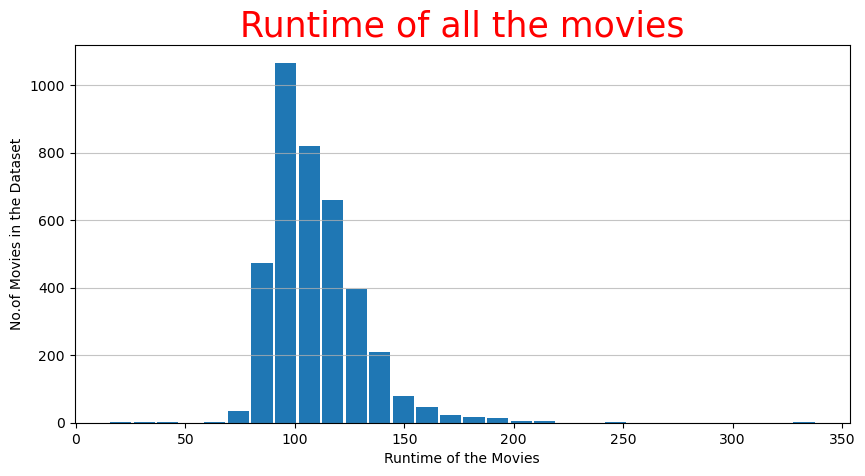

In [25]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,5), dpi = 100)
 
plt.xlabel('Runtime of the Movies', fontsize = 10) 
plt.ylabel('No.of Movies in the Dataset', fontsize=10)
plt.title('Runtime of all the movies', fontsize=25, color='red')

plt.hist(df['runtime'], rwidth = 0.9, bins = 30)
plt.grid(axis='y', alpha=0.75)
plt.show()



> - The distribution of the above formed graph is positively skewed or right skewed.
> - Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

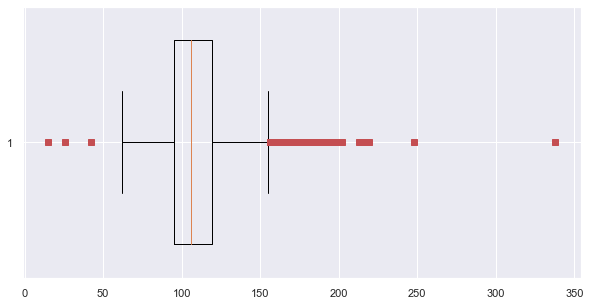

In [772]:
#show the box plot for runtime column
plt.figure(figsize=(10,5))
plt.boxplot(df['runtime'], sym='rs', vert=False, widths=[0.75])
plt.show()


In [773]:
#runtime column statistics 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>**By looking at both the plot and calculations, we can conclude that:**
>  - 25% of movies have a runtime of less than 95 minutes
>  - 50% of movies have a runtime of less than 109 minutes. (median)
>  - 75% of movies have a runtime of less than 119 minutes


### Question 6: How did the amount of produced films changed over time?

In [774]:
#create a list of releas years without duplicates
years = list(df['release_year'].unique())
#sort the years in ascending order
years.sort()
#dict to store the years and no.of movies
movies={}

>**for loop** to count no.of movies for every year and store them in a dictionary

In [775]:
#count no.of movies per year
for movie in years:
    movies[movie]= df['release_year'][df['release_year']== movie].count()


In [781]:
#create dataframe contains no.of movies per year
movies_year = pd.DataFrame(list(movies.items()), columns=['year','movies'])

In [782]:
#rotate the data frame to save space
movies_year.T

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
movies,5,10,7,6,7,5,5,13,9,4,...,169,165,167,174,178,199,158,180,165,160


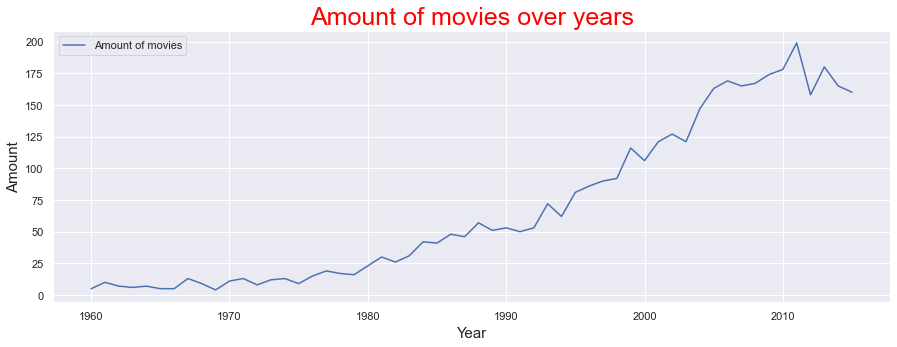

In [803]:
#plot the no.of movies per year
#plt.figure(figsize=(10,5))
movies_year.plot(x='year', y='movies', kind='line', figsize=(15,5), label="Amount of movies")
plt.title("Amount of movies over years",fontsize=25, color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.legend()
plt.show()

>The figure shows that the number of movies is increasing over the years but decreased after 2011

### Question 7: In which year we had most no.of profitable movies?.

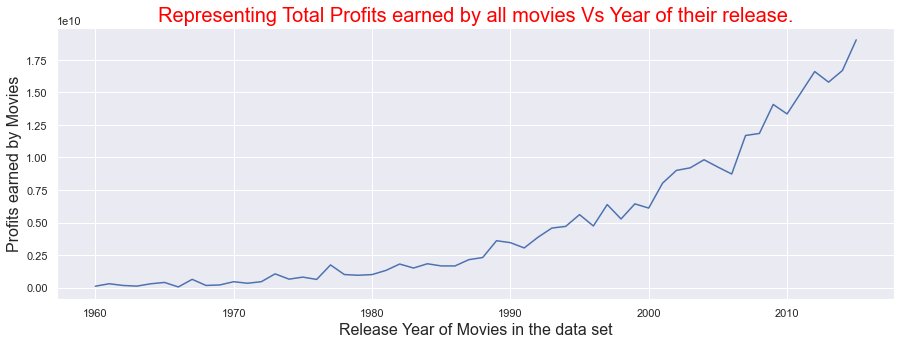

In [822]:
#Since we want to know the profits of movies for every year  
#therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#plotting the graph
plt.figure(figsize=(15,5))
plt.xlabel('Release Year of Movies in the data set', fontsize = 16)
plt.ylabel('Profits earned by Movies', fontsize = 16)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.', fontsize = 20, color='red')
plt.plot(profits_year)
plt.show()

In [823]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

>So  **2015** was the year where movies made the highest profit.

## Questions with respect to the profitable and ranked

> - Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.So lets fix this amount to 60 million dollar and store them in a dataframe
> - get movies which have earned a significant amount of profit greater than or equal 60 million and vote average 7 or greater and store them in another dataframe

In [894]:
#selecting the movies having profit $60M or more
profit_data = df[df['profit_earned'] >= 60000000]
#selecting the movies having profit $60M or more and ranking 7
rank_data = profit_data[profit_data['vote_average'] >= 7.0]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015


In [895]:
#counting the no.of rows in the new data frame
len(profit_data)

1197

In [896]:
len(rank_data)

283

>separate the column that have multiple values as a string (such as cast and genres) into several columns to applay the calculation

In [924]:
#function which will take a column and dataframe as arguments and keep its track 
def data(column, dataframe):
    #will take a column, and separate the string by '|'
    data = dataframe[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [925]:
#variable to store the retured value
count = data('genres', profit_data)
#printing top 5 values
count.head()

Comedy       434
Action       426
Drama        419
Thriller     358
Adventure    348
dtype: int64

### Q1- Show the successful genres

In [926]:
#create a dict that contains categories as keys and no.of movies as values
category_count={}
for cat in count.index:
    category_count[cat] = count[cat]

In [927]:
#get the keys for x-axis
x = list(category_count.keys())
#get the values for y-axis
y = list(category_count.values())

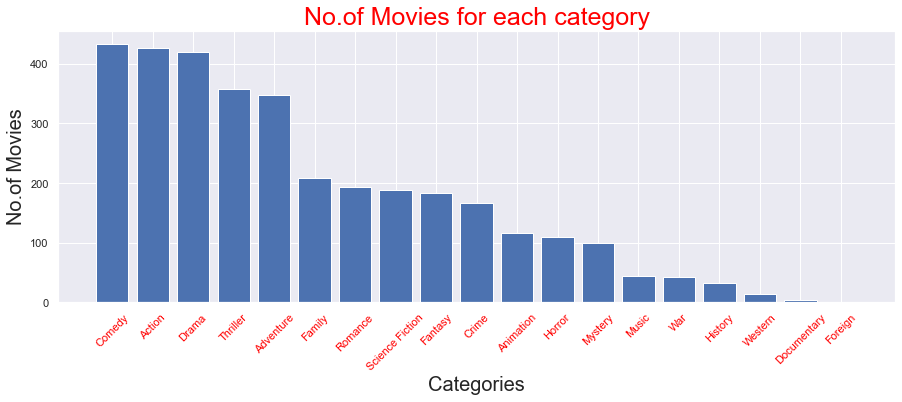

In [928]:

plt.figure(figsize=(15,5))
plt.xlabel('Categories', fontsize = 20) 
plt.ylabel('No.of Movies', fontsize=20)
plt.title('No.of Movies for each category', fontsize=25, color='red')

plt.bar(x,y)
plt.xticks(rotation= 45 ,color='red')
plt.show()

### Q2- The No.of movies for each category (most ranked and earned)
>this for movies ranked 7 or more and amount of profit 60 Million or more

In [929]:
data('genres', great_vote)

Drama              145
Action              91
Thriller            85
Adventure           75
Comedy              55
Crime               49
Science Fiction     47
Family              45
Fantasy             40
Romance             36
Animation           31
Mystery             26
War                 17
History             14
Music               13
Horror              11
Western              9
Documentary          1
dtype: int64

### Q3- Most Frequent Cast( most profit)

In [930]:
#variable to store the retured value
count = data('cast', profit_data)
#printing top 5 values
count.head()

Tom Cruise            26
Brad Pitt             22
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

### Q4- Most Frequent Cast( most ranked)

In [931]:
count = data('cast', great_vote)
#printing top 5 values
count.head()

Tom Hanks            14
Brad Pitt            11
Leonardo DiCaprio    10
Emma Watson           8
Matt Damon            8
dtype: int64

 ### Q5- Average Budget of the movies

>Create function to find average

In [932]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [933]:
# calling the above function for budget
profit_avg('budget')

63757867.39515455

>The movies having profit of 60 million dollar and more have an average budget of 63 million dollar.

### Q6- Average Revenue earned by the movies

In [934]:
#calling the above function for revenue
profit_avg('revenue')

274739298.8086884

>The movies having profit of 60 million dollar and more have an average revenue of 274 million dollar.

### Q7- Average duration of the movies

In [935]:
# calling the above function for 
profit_avg('runtime')

114.06850459482038

>So the movies having profit of 60 million dollar and more have an average duration of 114 minutes.

<a id='conclusions'></a>
## Conclusions:

> - In order to ensure the highest rank :
     - Any one of these should be in the cast : Tom Hanks,Brad Pitt,Leonardo DiCaprio,Emma Watson,Matt Damon.
     - Genre must be : Drama,Action,Thriller,Adventure,Comedy.

> - For a Movie to be in successful criteria :
    - Average Budget must be around 63.7 millon dollar
    - Average duration of the movie must be 114 minutes
    - Any one of these should be in the cast : Tom Cruise, Brad Pitt,Tom Hanks,Sylvester Stallone,Cameron Diaz  
    - Genre must be : Comedy, Action,Drama, Thriller,  Adventure.
> - <font color= blue>**By doing all this the movie might be one of the hits and hence can earn an average revenue of around 274.7 million dollar.**</font>
***
### Limitations:
   - This analysis was done considering the movies which had a significant amount of profit of around 60 million dollar.
   - This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit.
   - Moreover we are not sure if the data provided to us is completel corect and up-to-date. 
   - As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. 
   - So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.